# IMPORTING PYTHON PACKAGES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# IMPORTING DATASET

In [2]:
df_flight=pd.read_excel('Data_Train.xlsx')
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


LABEL ENCODING

In [3]:
le=LabelEncoder()
list=['Airline','Source','Destination','Route','Total_Stops','Additional_Info']
for val in list:
    df_flight[val]=le.fit_transform(df_flight[val].astype(str))
df_flight

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,5,8,3897
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,1,8,7662
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,1,8,13882
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,0,8,6218
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,5,8,4107
10679,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,5,8,4145
10680,4,27/04/2019,0,2,18,08:20,11:20,3h,5,8,7229
10681,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,5,8,12648


# EXPLORATORY DATA ANALYSIS 

In [4]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24/03/2019,0,5,18,22:20,01:10 22 Mar,2h 50m,5,8,3897
1,1,1/05/2019,3,0,84,05:50,13:15,7h 25m,1,8,7662
2,4,9/06/2019,2,1,118,09:25,04:25 10 Jun,19h,1,8,13882
3,3,12/05/2019,3,0,91,18:05,23:30,5h 25m,0,8,6218
4,3,01/03/2019,0,5,29,16:50,21:35,4h 45m,0,8,13302


In [5]:
df_flight.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,0,9/04/2019,3,0,64,19:55,22:25,2h 30m,5,8,4107
10679,1,27/04/2019,3,0,64,20:45,23:20,2h 35m,5,8,4145
10680,4,27/04/2019,0,2,18,08:20,11:20,3h,5,8,7229
10681,10,01/03/2019,0,5,18,11:30,14:10,2h 40m,5,8,12648
10682,1,9/05/2019,2,1,108,10:55,19:15,8h 20m,1,8,11753


In [6]:
df_flight.shape

(10683, 11)

In [7]:
df_flight.dtypes

Airline             int32
Date_of_Journey    object
Source              int32
Destination         int32
Route               int32
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int32
Additional_Info     int32
Price               int64
dtype: object

In [8]:
df_flight.drop(df_flight.columns[[1,5,6]],axis=1,inplace=True)
df_flight['Duration']=pd.to_timedelta(df_flight['Duration'])
df_flight['Duration']=df_flight.Duration.dt.total_seconds()
df_flight

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,3,0,5,18,10200.0,5,8,3897
1,1,3,0,84,26700.0,1,8,7662
2,4,2,1,118,68400.0,1,8,13882
3,3,3,0,91,19500.0,0,8,6218
4,3,0,5,29,17100.0,0,8,13302
...,...,...,...,...,...,...,...,...
10678,0,3,0,64,9000.0,5,8,4107
10679,1,3,0,64,9300.0,5,8,4145
10680,4,0,2,18,10800.0,5,8,7229
10681,10,0,5,18,9600.0,5,8,12648


In [9]:
df_flight.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [10]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 8 columns):
Airline            10683 non-null int32
Source             10683 non-null int32
Destination        10683 non-null int32
Route              10683 non-null int32
Duration           10683 non-null float64
Total_Stops        10683 non-null int32
Additional_Info    10683 non-null int32
Price              10683 non-null int64
dtypes: float64(1), int32(6), int64(1)
memory usage: 417.4 KB


In [11]:
df_flight.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,1.952261,1.436113,74.825143,38585.593934,1.785266,7.393054,9087.064121
std,2.352155,1.177221,1.474782,36.730924,30471.720053,2.268105,1.214211,4611.359167
min,0.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,48.000000,10200.000000,0.000000,8.000000,5277.000000
50%,4.000000,2.000000,1.000000,73.000000,31200.000000,0.000000,8.000000,8372.000000
75%,4.000000,3.000000,2.000000,104.000000,55800.000000,5.000000,8.000000,12373.000000
max,11.000000,4.000000,5.000000,128.000000,171600.000000,5.000000,9.000000,79512.000000


Data in the column 'Total_Stops' does not appear to have normal distribution. Data in all other columns appear to have normal distribution (mean very close to 50th percentile).

In [12]:
#sns.heatmap(df_flight.isnull(),annot=True)

In [13]:
df_flight.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

CHECKING DATA SKEWNESS

In [14]:
df_flight.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.501909
Duration           0.861074
Total_Stops        0.668085
Additional_Info   -1.779838
Price              1.812552
dtype: float64

REMOVING DATA SKEWNESS

In [15]:
for col in df_flight.columns:
    if df_flight.skew().loc[col]>0.55:
        df_flight[col]=np.log1p(df_flight[col])
df_flight.skew()

Airline           -0.679875
Source            -0.424054
Destination        0.283084
Route             -0.501909
Duration          -0.173977
Total_Stops        0.510400
Additional_Info   -1.779838
Price             -0.254565
dtype: float64

CHECKING OUTLIERS

In [16]:
z=np.abs(zscore(df_flight))
print(z.shape)
print(np.where(z>3))

(10683, 8)
(array([  657,   785,  1043,  1478,  2079,  2405,  2481,  2495,  2556,
        2618,  2924,  2924,  3032,  3111,  3700,  3788,  4521,  5013,
        5372,  5372,  5439,  5628,  6024,  6336,  6474,  6576,  7351,
        7724,  8957,  9019,  9657,  9715, 10364, 10364, 10511],
      dtype=int64), array([7, 6, 6, 7, 6, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6,
       6, 6, 4, 6, 7, 6, 6, 6, 6, 7, 6, 7, 6], dtype=int64))


REMOVING OUTLIERS

In [17]:
df_final=df_flight.loc[(z<3).all(axis=1)]
print(df_final.shape)

(10651, 8)


CORRELATION

In [18]:
df_final.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,-0.009049,0.033502,0.045648,-0.088580,-0.056448,-0.164934,0.010654
Source,-0.009049,1.000000,-0.625785,0.398909,0.124356,-0.224271,-0.044559,0.028164
Destination,0.033502,-0.625785,1.000000,-0.343340,-0.351384,0.348342,0.067399,-0.206534
Route,0.045648,0.398909,-0.343340,1.000000,0.375659,-0.419361,0.014204,0.259007
Duration,-0.088580,0.124356,-0.351384,0.375659,1.000000,-0.762643,-0.176732,0.732259
Total_Stops,-0.056448,-0.224271,0.348342,-0.419361,-0.762643,1.000000,0.165090,-0.648473
Additional_Info,-0.164934,-0.044559,0.067399,0.014204,-0.176732,0.165090,1.000000,-0.069317
Price,0.010654,0.028164,-0.206534,0.259007,0.732259,-0.648473,-0.069317,1.000000


PAIRPLOT

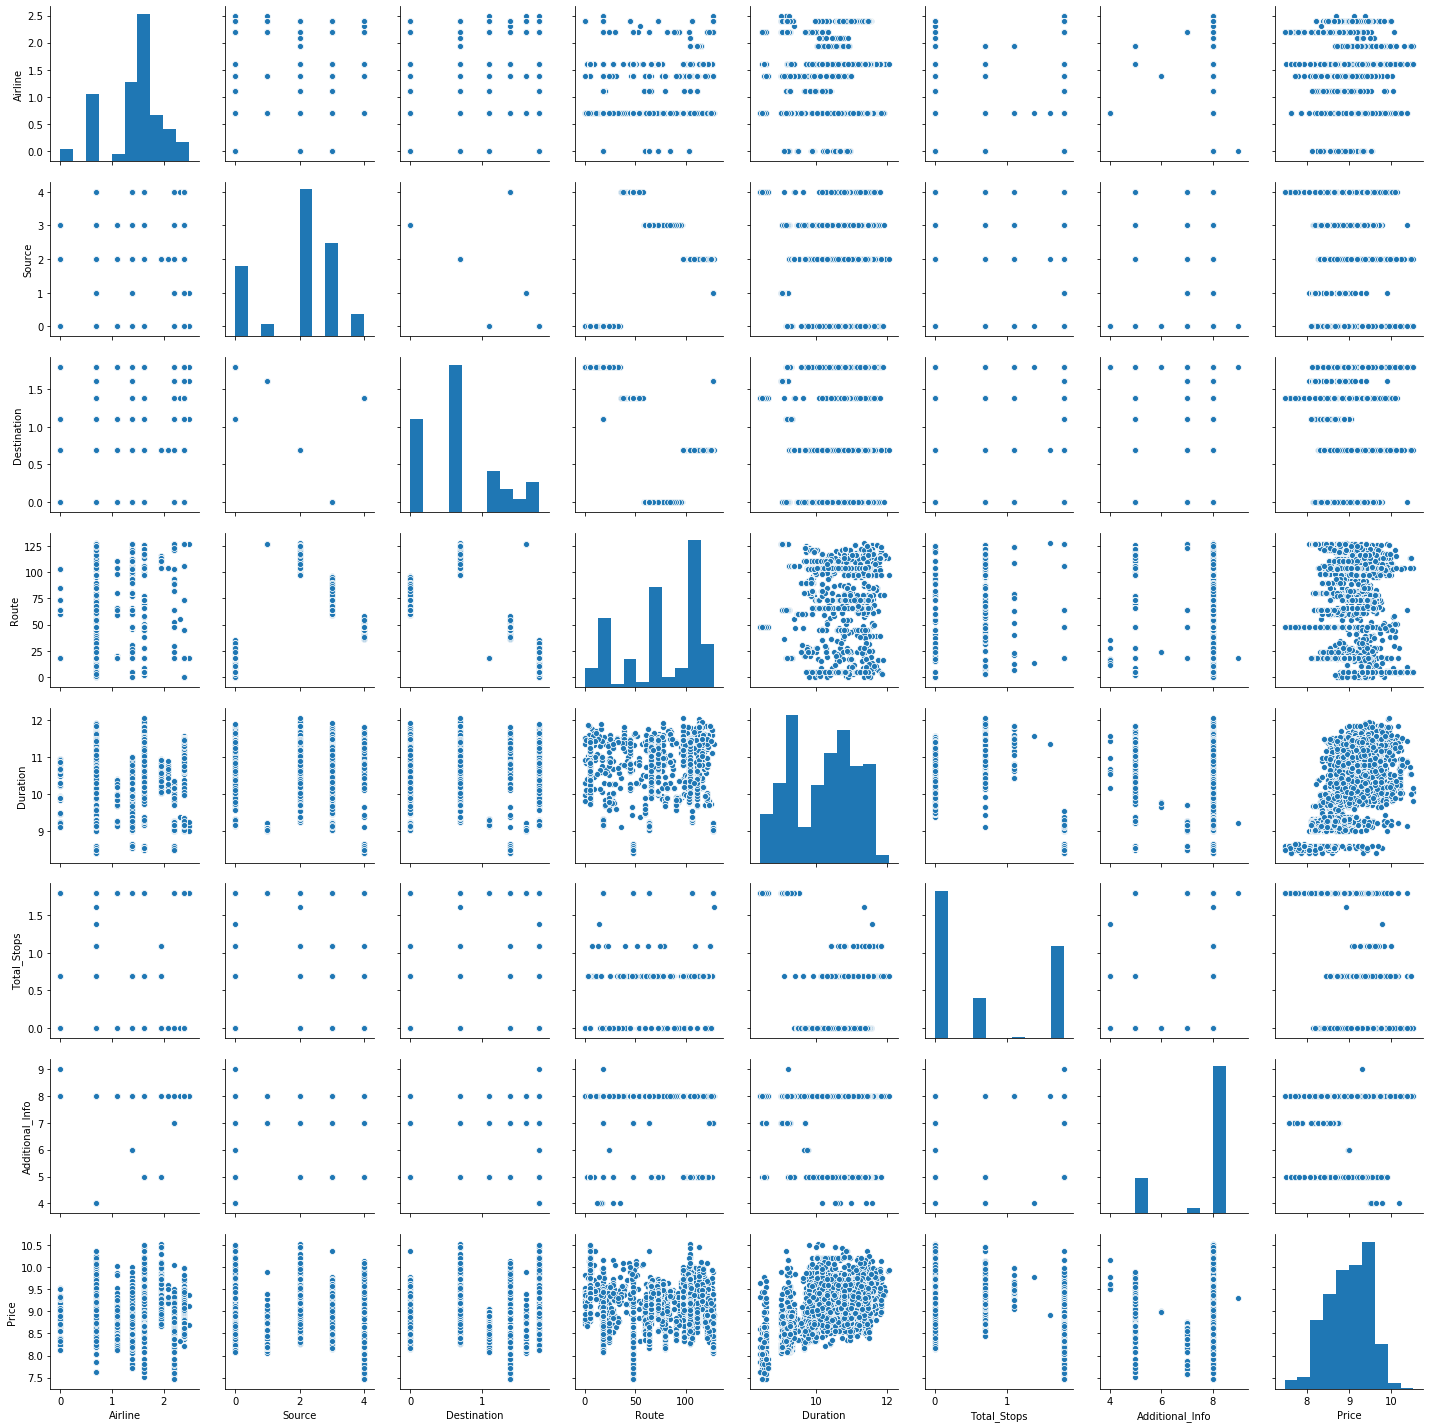

In [19]:
sns.pairplot(df_final)

# TRAIN AND TEST DATA

In [20]:
df_x=df_final.iloc[:,:-1]
print(df_x)
y=df_final.iloc[:,-1]
print(y)
print()
print(df_x.shape)
print(y.shape)

        Airline  Source  Destination  Route   Duration  Total_Stops  \
0      1.386294       0     1.791759     18   9.230241     1.791759   
1      0.693147       3     0.000000     84  10.192456     0.693147   
2      1.609438       2     0.693147    118  11.133143     0.693147   
3      1.386294       3     0.000000     91   9.878221     0.000000   
4      1.386294       0     1.791759     29   9.746892     0.000000   
...         ...     ...          ...    ...        ...          ...   
10678  0.000000       3     0.000000     64   9.105091     1.791759   
10679  0.693147       3     0.000000     64   9.137877     1.791759   
10680  1.609438       0     1.098612     18   9.287394     1.791759   
10681  2.397895       0     1.791759     18   9.169623     1.791759   
10682  0.693147       2     0.693147    108  10.308986     0.693147   

       Additional_Info  
0                    8  
1                    8  
2                    8  
3                    8  
4                    8

In [21]:
x=df_x

# TRAINING AND TESTING - VARIOUS MODELS

FUNCTION DECLARATION

In [22]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("R2 Score corresponding to ",r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("Maximum R2 Score corresponds to ",final_r_state," is ",max_r_score)
    return(final_r_state)

LOGISTIC REGRESSION

In [23]:
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

R2 Score corresponding to  42  is  0.5678854316084214
R2 Score corresponding to  43  is  0.5743871009779316
R2 Score corresponding to  44  is  0.5505735579124931
R2 Score corresponding to  45  is  0.5589750340498065
R2 Score corresponding to  46  is  0.5696100120133873
R2 Score corresponding to  47  is  0.6029521802952506
R2 Score corresponding to  48  is  0.5693447024045135
R2 Score corresponding to  49  is  0.5794277284968217
R2 Score corresponding to  50  is  0.5807208342818744
R2 Score corresponding to  51  is  0.5737607002716589
R2 Score corresponding to  52  is  0.5880739003124507
R2 Score corresponding to  53  is  0.5462326273510176
R2 Score corresponding to  54  is  0.5457532700297089
R2 Score corresponding to  55  is  0.5903289499308849
R2 Score corresponding to  56  is  0.5973043846424704
R2 Score corresponding to  57  is  0.5582251804283329
R2 Score corresponding to  58  is  0.5706167784348859
R2 Score corresponding to  59  is  0.5683624077159447
R2 Score corresponding to  6

In [24]:
print("Mean R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean())
print("Standard Deviation in R2 Score for Linear Regression is ",cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').std())

Mean R2 Score for Linear Regression is  0.5724742082888941
Standard Deviation in R2 Score for Linear Regression is  0.019073546447872923


KNEIGHBORS REGRESSOR

In [25]:
neighbors={"n_neighbors":range(1,10)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=5)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 9}

In [26]:
knr=KNeighborsRegressor(n_neighbors=9)
r_state=maxr2_score(knr,x,y)

R2 Score corresponding to  42  is  0.8295685838390287
R2 Score corresponding to  43  is  0.8069729868175797
R2 Score corresponding to  44  is  0.818822012160146
R2 Score corresponding to  45  is  0.8079848070028499
R2 Score corresponding to  46  is  0.8196452647176664
R2 Score corresponding to  47  is  0.8409048890081323
R2 Score corresponding to  48  is  0.8189586952134715
R2 Score corresponding to  49  is  0.8273334354050148
R2 Score corresponding to  50  is  0.8377626841383212
R2 Score corresponding to  51  is  0.8235442191461795
R2 Score corresponding to  52  is  0.8234691178294417
R2 Score corresponding to  53  is  0.8242505723623914
R2 Score corresponding to  54  is  0.8032006116543972
R2 Score corresponding to  55  is  0.8409651468032469
R2 Score corresponding to  56  is  0.8267701093484082
R2 Score corresponding to  57  is  0.8296591894335773
R2 Score corresponding to  58  is  0.825358968053781
R2 Score corresponding to  59  is  0.8127734413342476
R2 Score corresponding to  60 

In [27]:
print("Mean R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for KNN Regression is ",cross_val_score(knr,x,y,cv=5,scoring='r2').std())

Mean R2 Score for KNN Regression is  0.8216388211181102
Standard Deviation in R2 Score for KNN Regression is  0.009051272059378982


LASSO REGRESSION

In [28]:
ls=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(ls,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [29]:
ls=Lasso(alpha=0.001)
r_state=maxr2_score(ls,x,y)

R2 Score corresponding to  42  is  0.567428007673872
R2 Score corresponding to  43  is  0.574472906327075
R2 Score corresponding to  44  is  0.5507250949045757
R2 Score corresponding to  45  is  0.5587303845575422
R2 Score corresponding to  46  is  0.569508158581472
R2 Score corresponding to  47  is  0.602837670371299
R2 Score corresponding to  48  is  0.5692781093689712
R2 Score corresponding to  49  is  0.5791249347202404
R2 Score corresponding to  50  is  0.5805803800397813
R2 Score corresponding to  51  is  0.5736552985295659
R2 Score corresponding to  52  is  0.5878518425225655
R2 Score corresponding to  53  is  0.5463367936181263
R2 Score corresponding to  54  is  0.5462103881192644
R2 Score corresponding to  55  is  0.5901064078139872
R2 Score corresponding to  56  is  0.5969943185781984
R2 Score corresponding to  57  is  0.5577963127232699
R2 Score corresponding to  58  is  0.5705007836388025
R2 Score corresponding to  59  is  0.5680824395601736
R2 Score corresponding to  60  i

In [30]:
print("Mean R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Lasso Regression is ",cross_val_score(ls,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Lasso Regression is  0.5724221494136833
Standard Deviation in R2 Score for Lasso Regression is  0.01916313347569494


RIDGE REGRESSION

In [31]:
rd=Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(rd,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [32]:
rd=Ridge(alpha=1)
r_state=maxr2_score(rd,x,y)

R2 Score corresponding to  42  is  0.5678849792649865
R2 Score corresponding to  43  is  0.5743889290083483
R2 Score corresponding to  44  is  0.5505777900895753
R2 Score corresponding to  45  is  0.5589740643569276
R2 Score corresponding to  46  is  0.5696121321162297
R2 Score corresponding to  47  is  0.6029494370196489
R2 Score corresponding to  48  is  0.5693425767212739
R2 Score corresponding to  49  is  0.579427133376721
R2 Score corresponding to  50  is  0.5807182433026299
R2 Score corresponding to  51  is  0.5737582254878391
R2 Score corresponding to  52  is  0.5880689560467487
R2 Score corresponding to  53  is  0.546237329942991
R2 Score corresponding to  54  is  0.545761623570184
R2 Score corresponding to  55  is  0.59032225568945
R2 Score corresponding to  56  is  0.5972991025924366
R2 Score corresponding to  57  is  0.5582226238211019
R2 Score corresponding to  58  is  0.570616516846109
R2 Score corresponding to  59  is  0.568363811060846
R2 Score corresponding to  60  is  

In [33]:
print("Mean R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Ridge Regression is ",cross_val_score(rd,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Ridge Regression is  0.5724745078646601
Standard Deviation in R2 Score for Ridge Regression is  0.019071505114163483


ELASTIC NET REGRESSION

In [34]:
enr=ElasticNet()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(enr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [35]:
enr=ElasticNet(alpha=0.001)
r_state=maxr2_score(enr,x,y)

R2 Score corresponding to  42  is  0.5676662221456272
R2 Score corresponding to  43  is  0.5744476560494863
R2 Score corresponding to  44  is  0.5506780962310949
R2 Score corresponding to  45  is  0.5588598347426512
R2 Score corresponding to  46  is  0.5695781061022189
R2 Score corresponding to  47  is  0.6028929099807374
R2 Score corresponding to  48  is  0.5693130214739928
R2 Score corresponding to  49  is  0.5792838205786786
R2 Score corresponding to  50  is  0.5806498733754613
R2 Score corresponding to  51  is  0.573707763237911
R2 Score corresponding to  52  is  0.5879533642245554
R2 Score corresponding to  53  is  0.5463150726799599
R2 Score corresponding to  54  is  0.5460274800908935
R2 Score corresponding to  55  is  0.5901990238864465
R2 Score corresponding to  56  is  0.5971368681091791
R2 Score corresponding to  57  is  0.558010457407735
R2 Score corresponding to  58  is  0.5705681922477752
R2 Score corresponding to  59  is  0.5682391264321596
R2 Score corresponding to  60 

In [36]:
print("Mean R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Elastic Net Regression is ",cross_val_score(enr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Elastic Net Regression is  0.5724598089478936
Standard Deviation in R2 Score for Elastic Net Regression is  0.019108978389761368


GRADIENT BOOSTING REGRESSOR

In [37]:
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [38]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=1000)
r_state=maxr2_score(gbr,x,y)

R2 Score corresponding to  42  is  0.8409211149369946
R2 Score corresponding to  43  is  0.8199389980231264
R2 Score corresponding to  44  is  0.8271815364550088
R2 Score corresponding to  45  is  0.8204650246386704
R2 Score corresponding to  46  is  0.8251844558959585
R2 Score corresponding to  47  is  0.8571374348560612
R2 Score corresponding to  48  is  0.8294751413412278
R2 Score corresponding to  49  is  0.8413409488647833
R2 Score corresponding to  50  is  0.8436117578102834
R2 Score corresponding to  51  is  0.834298601094145
R2 Score corresponding to  52  is  0.8372483364161712
R2 Score corresponding to  53  is  0.8348915825876255
R2 Score corresponding to  54  is  0.8079236249848752
R2 Score corresponding to  55  is  0.8500725884762574
R2 Score corresponding to  56  is  0.8401998760547273
R2 Score corresponding to  57  is  0.8361152852908202
R2 Score corresponding to  58  is  0.8303970117324255
R2 Score corresponding to  59  is  0.8137290368211545
R2 Score corresponding to  60

In [39]:
print("Mean R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in R2 Score for Gradient Boosting Regressor is ",cross_val_score(gbr,x,y,cv=5,scoring="r2").std())

Mean R2 Score for Gradient Boosting Regressor is  0.8290051453886939
Standard Deviation in R2 Score for Gradient Boosting Regressor is  0.008089988722974084


# BEST MODEL

R2 SCORE AND RMSE

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=47,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)
print("R2 Score is ",r2_score(y_test,y_pred))
print("RMSE is ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score is  0.8243634562587324
RMSE is  0.2175872689140197


CROSS VALIDATION

In [41]:
score=cross_val_score(gbr,x,y,cv=5)
print('Score is ',score)
print('Mean Score is ', score.mean())
print('Standard Deviation is ',score.std())

Score is  [0.80083952 0.81382292 0.80363163 0.77914591 0.80964266]
Mean Score is  0.8014165268458999
Standard Deviation is  0.012023377900929133


# PICKLE 

In [42]:
joblib.dump(gbr,'flight.pkl')

['flight.pkl']